<a href="https://colab.research.google.com/github/gr3ybr0w/cookbook/blob/master/plotting/matplotlib/Pareto_in_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional

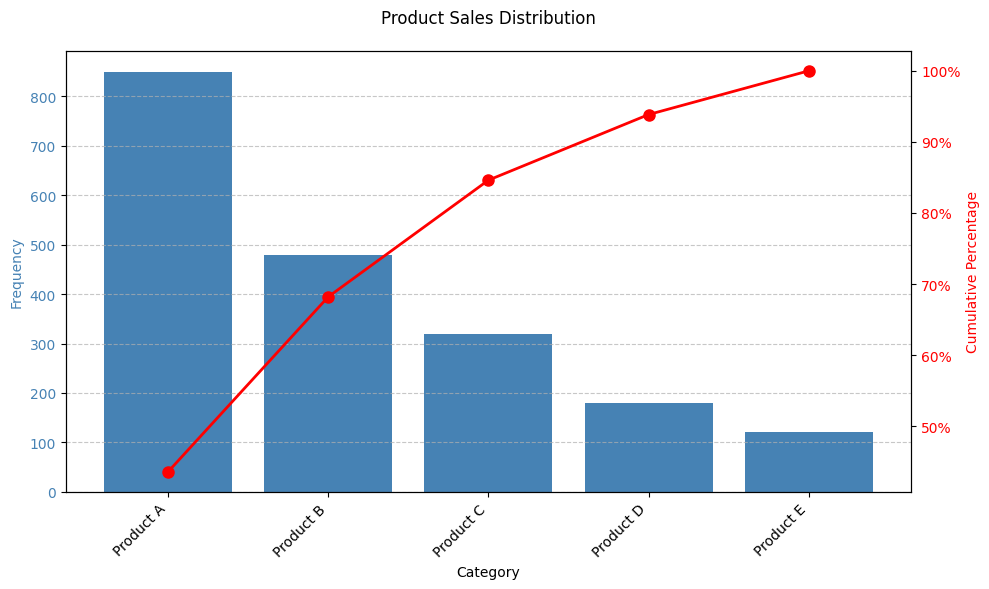

In [2]:
def create_pareto_chart(
    categories: List[str],
    values: List[float],
    title: str = "Pareto Chart",
    bar_color: str = "steelblue",
    line_color: str = "red",
    figsize: Tuple[int, int] = (10, 6)
) -> Tuple[plt.Figure, plt.Axes]:
    """
    Creates a Pareto chart using Matplotlib with frequency on the left axis and
    cumulative percentage on the right axis.

    Args:
        categories (List[str]): List of category names
        values (List[float]): List of corresponding values for each category
        title (str, optional): Title of the chart. Defaults to "Pareto Chart"
        bar_color (str, optional): Color for the bars. Defaults to "steelblue"
        line_color (str, optional): Color for the line and points. Defaults to "red"
        figsize (Tuple[int, int], optional): Figure size (width, height). Defaults to (10, 6)

    Returns:
        Tuple[plt.Figure, plt.Axes]: Figure and axes objects for further customization if needed

    Example:
        >>> categories = ['A', 'B', 'C', 'D']
        >>> values = [100, 40, 20, 10]
        >>> fig, ax = create_pareto_chart(categories, values, "Product Defects")
        >>> plt.show()
    """
    # Create DataFrame with the data
    df = pd.DataFrame({
        'category': categories,
        'value': values
    })

    # Sort by value in descending order
    df = df.sort_values('value', ascending=False)

    # Calculate cumulative percentage
    total = df['value'].sum()
    df['cumulative_percentage'] = 100 * df['value'].cumsum() / total

    # Create figure and axis objects with a single subplot
    fig, ax1 = plt.subplots(figsize=figsize)

    # Set title
    plt.title(title, pad=20)

    # Plot bars on primary axis
    bars = ax1.bar(df['category'], df['value'], color=bar_color)
    ax1.set_xlabel('Category')
    ax1.set_ylabel('Frequency', color=bar_color)
    ax1.tick_params(axis='y', labelcolor=bar_color)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Create secondary axis for percentage
    ax2 = ax1.twinx()

    # Plot line and points on secondary axis
    line = ax2.plot(df['category'], df['cumulative_percentage'],
                   color=line_color, linewidth=2, marker='o',
                   markersize=8, label='Cumulative %')
    ax2.set_ylabel('Cumulative Percentage', color=line_color)
    ax2.tick_params(axis='y', labelcolor=line_color)

    # Format y-axis as percentage
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y/100)))

    # Add gridlines
    ax1.yaxis.grid(True, linestyle='--', alpha=0.7)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    return fig, ax1

# Create example data
categories = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
values = [850, 480, 320, 180, 120]

# Create the chart
fig, ax = create_pareto_chart(
    categories=categories,
    values=values,
    title="Product Sales Distribution"
)

# Display the chart
plt.show()